In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [19]:
df = pd.read_csv('heart_disease_data.csv')


In [3]:
print(df.head())
print(df['smoking'].value_counts())  # Check if smoking column exists


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        0      150      0      2.3      0   
1   37    1   3       130   250    0        1      187      0      3.5      0   
2   41    0   2       130   204    0        0      172      0      1.4      2   
3   56    1   2       120   236    0        1      178      0      0.8      2   
4   57    0   4       120   354    0        0      163      1      0.6      2   

   ca  thal  smoking  target  
0   0     1        1       1  
1   0     2        0       1  
2   0     2        1       1  
3   0     2        0       1  
4   0     2        1       0  
smoking
1    6
0    4
Name: count, dtype: int64


In [4]:
# encoding variables
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)


In [5]:
# Features and Target
X = df.drop('target', axis=1)
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Train Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [11]:
#  Predict & Evaluate
y_pred = model.predict(X_test)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



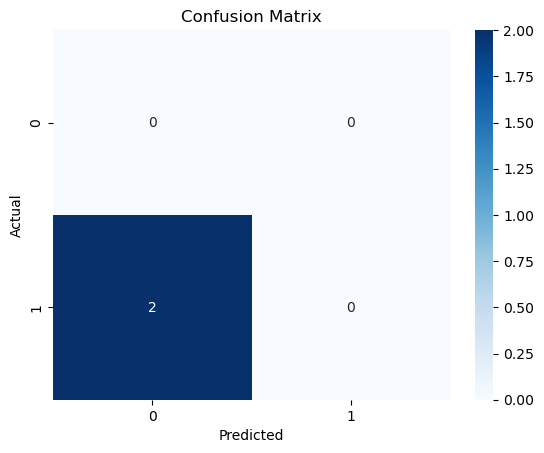

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

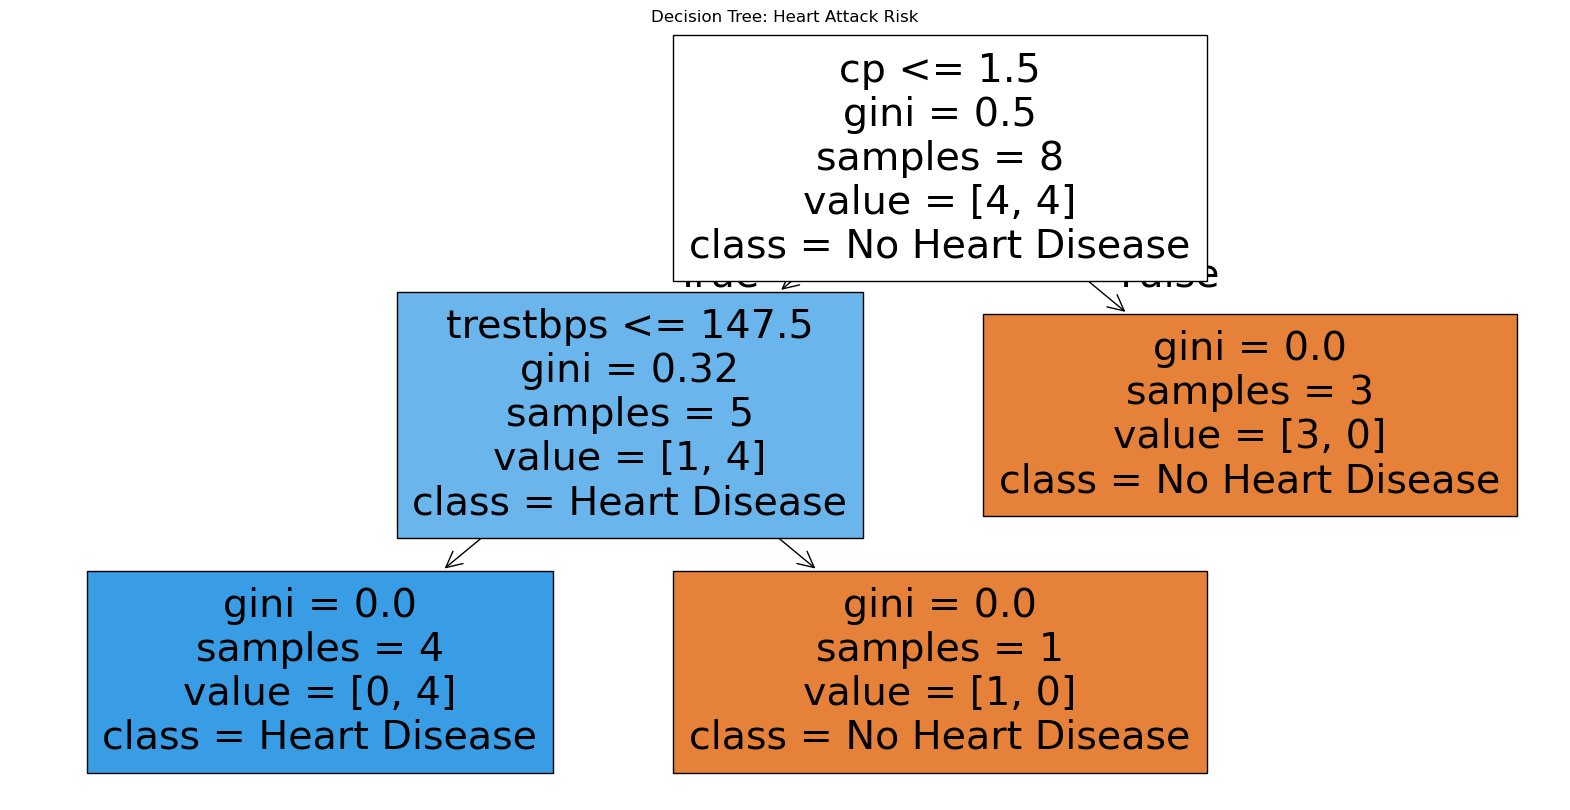

In [22]:
#  Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["No Heart Disease", "Heart Disease"], filled=True)
plt.title("Decision Tree: Heart Attack Risk")
plt.show()